In [1]:
import pandas as pd
import numpy as np

In [2]:
#importando o banco pelo collab
from google.colab import files
uploaded = files.upload()

Saving data8.dta to data8.dta


In [3]:
import pandas as pd
# Substitua 'data.dta' pelo nome real do seu arquivo
df = pd.read_stata('data8.dta')

# Visualize as primeiras linhas do dataframe
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo,corpele,idade,trabalha,cafedamanha,...,bullying,motivo_bullying,sozinho,insonia,amigos,imagem_imp,satisf_corp,imagem_corp,imc_cat_recoded,quintil_socioecon
0,0.0,15.0,0.0,15.0,60.0,Feminino,Branca,13 anos,Não,"Sim, todos os dias",...,Nunca,NaN,Nunca,Nunca,3 ou mais amigos,Muito importante,Satisfeito,Muito magro,Déficit de peso e Eutrofia,5.0
1,120.0,510.0,260.0,130.0,300.0,Feminino,Branca,14 anos,Não,Raramente,...,Nunca,NaN,Na maior parte do tempo,Na maior parte do tempo,3 ou mais amigos,Pouco importante,Satisfeito,Normal,Déficit de peso e Eutrofia,4.0
2,0.0,585.0,130.0,455.0,420.0,Masculino,Parda,13 anos,Não,Raramente,...,Raramente,Outros motivos/causas,Nunca,Raramente,2 amigos,Muito importante,Satisfeito,Normal,Déficit de peso e Eutrofia,5.0
3,0.0,0.0,0.0,0.0,0.0,Masculino,Branca,14 anos,Não,"Sim, todos os dias",...,Nunca,NaN,Raramente,Raramente,3 ou mais amigos,Muito importante,Satisfeito,Normal,Sobrepeso e Obesidade,5.0
4,30.0,165.0,90.0,45.0,60.0,Masculino,Branca,13 anos,Não,"Sim, todos os dias",...,Raramente,Aparência do corpo,Raramente,Raramente,3 ou mais amigos,Muito importante,Insatisfeito,Gordo,Sobrepeso e Obesidade,5.0


In [4]:
df['quintil_socioecon'] = df['quintil_socioecon'].astype('category')


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [6]:
# Verificar a presença de valores nulos
null_counts = df.isnull().sum()
print("Valores nulos em cada coluna:")
print(null_counts[null_counts > 0])

Valores nulos em cada coluna:
TEMPODESLOC            33
TEMPOTOTAL             20
TEMPOEDFIS             84
TEMPOEXTRA             93
TEMPOEST              110
corpele                23
trabalha               14
cafedamanha            12
almojanta              25
comer_tvestuda         15
merenda              1135
comemerenda          5445
feijao_7               36
salgado_7              37
legumeverdura_7        34
guloseima_7            39
frutas_7               37
refrigerante_7         29
aup_7                  50
fastfood_7             37
ficoucfome             30
frutas_30              46
legumeverdura_30       59
refrigerante_30        40
tempo_tv               50
tempo_telas            84
tabagismo            4729
alcool               4743
drogas               4741
bullying              103
motivo_bullying      9329
sozinho                66
insonia                77
amigos                 67
imagem_imp            155
satisf_corp           181
imagem_corp           159
quintil_

In [7]:
# Identificar colunas categóricas e contínuas
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
continuous_cols = df.select_dtypes(include=['float64']).columns

In [8]:
# Tratamento de valores nulos
# Para variáveis contínuas: substituir nulos pela mediana
imputer_cont = SimpleImputer(strategy='median')
df[continuous_cols] = imputer_cont.fit_transform(df[continuous_cols])

In [9]:
# Para variáveis categóricas: substituir nulos pela moda
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

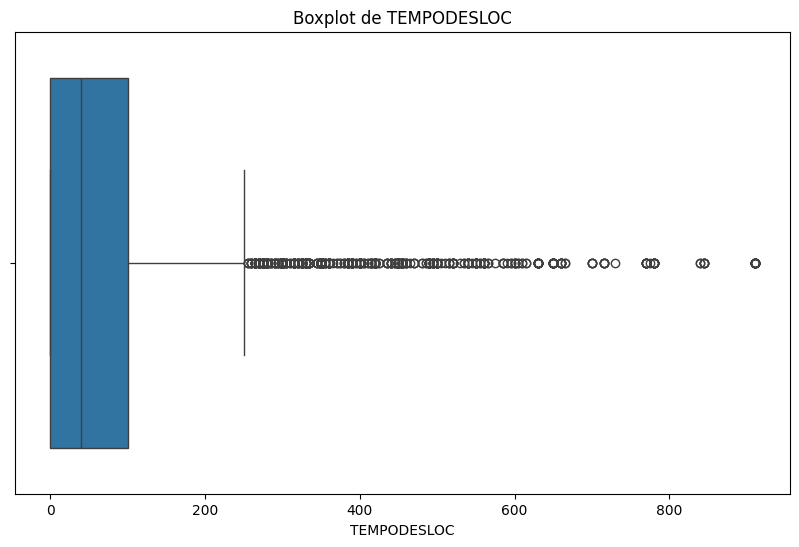

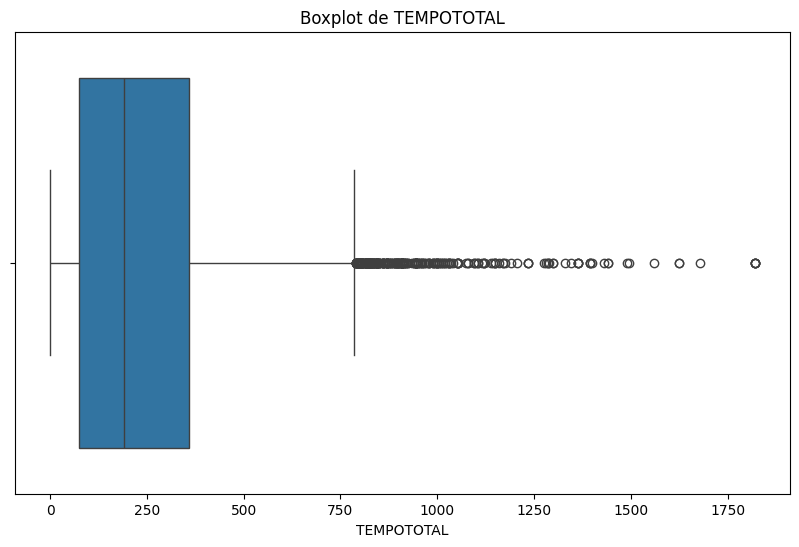

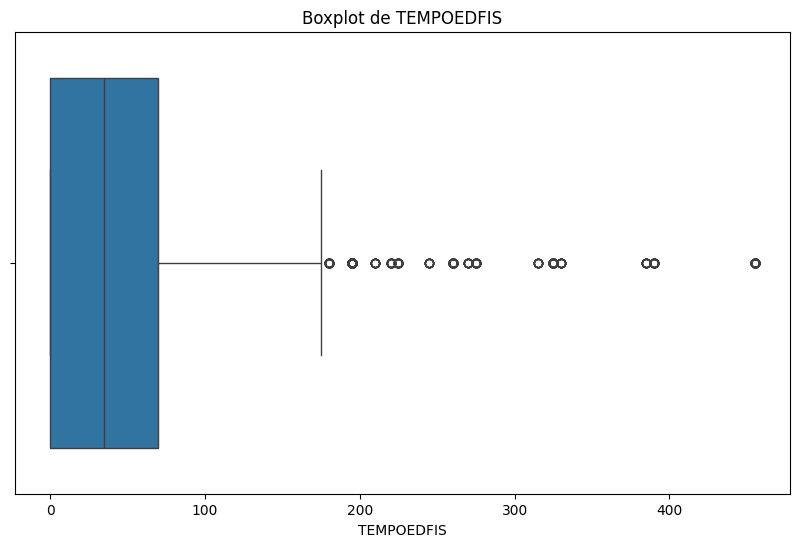

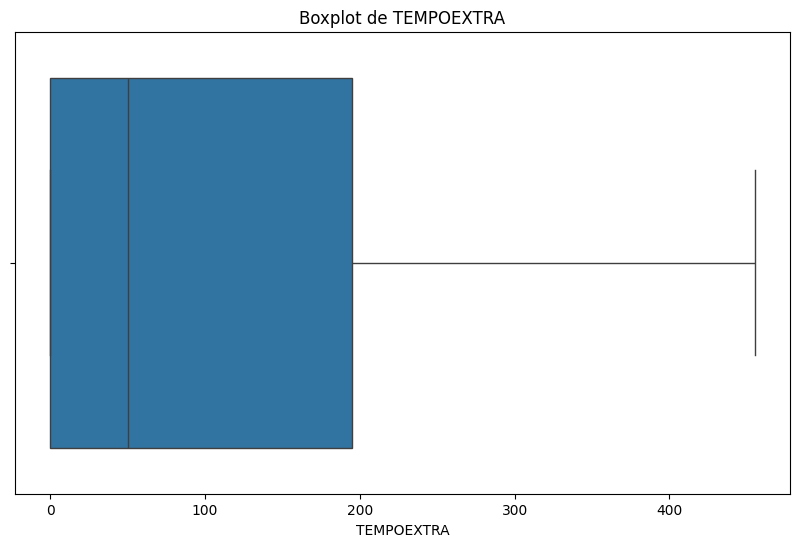

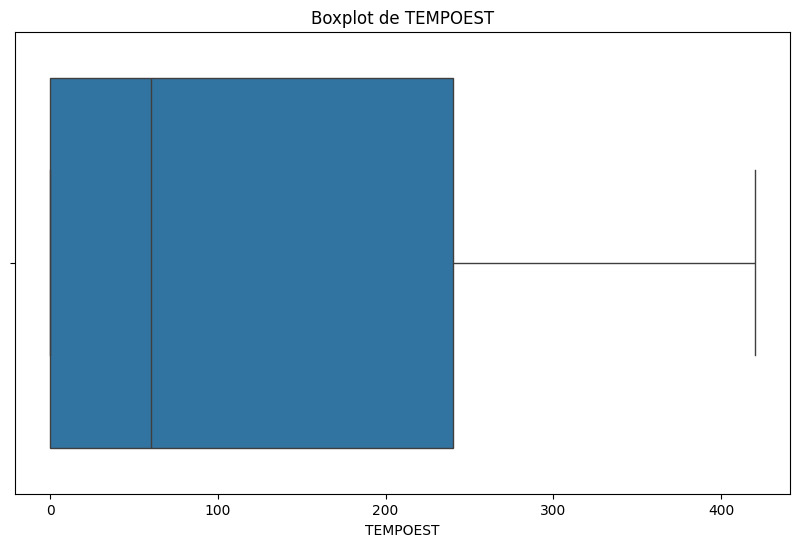

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo para múltiplas colunas
features = ['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST']

# Criar boxplots para cada coluna
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

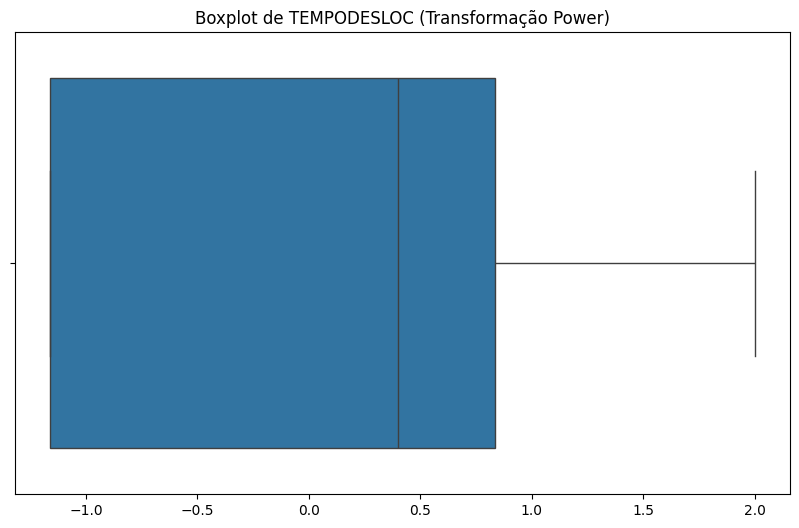

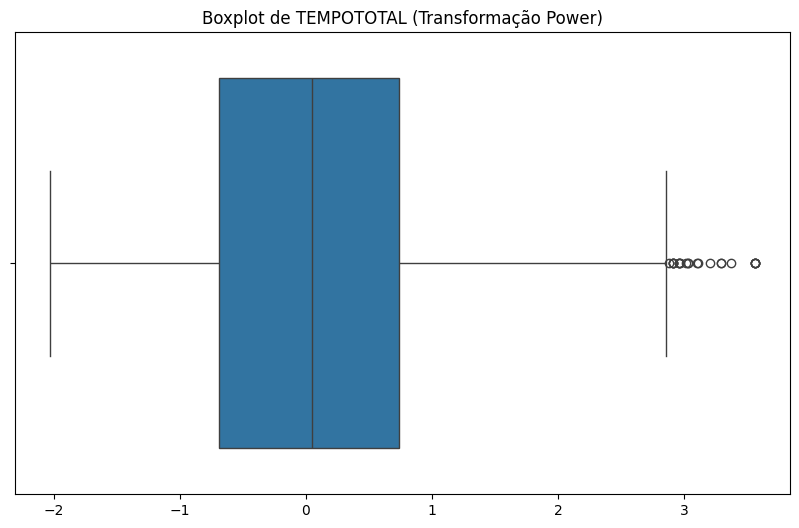

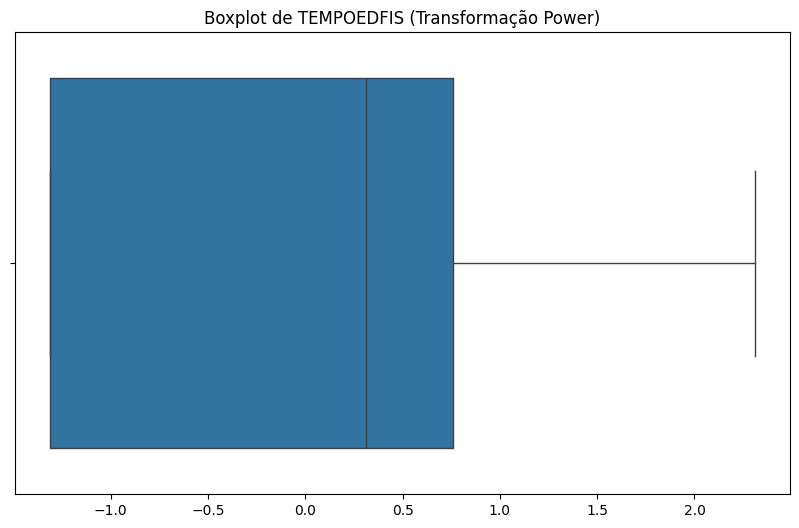

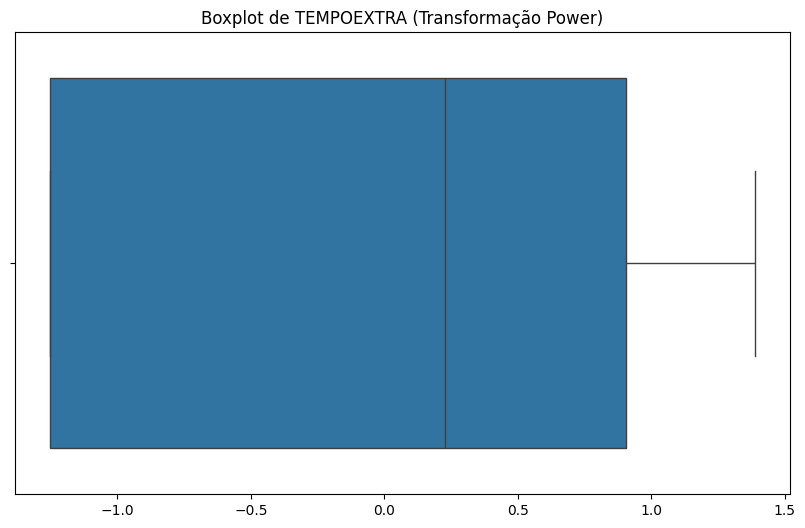

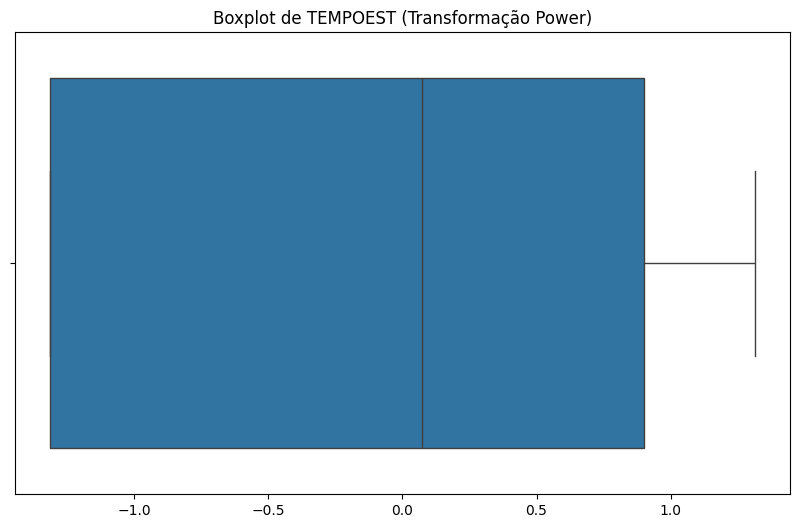

In [11]:
from sklearn.preprocessing import PowerTransformer

# Aplicando a transformação Power (Box-Cox ou Yeo-Johnson) e criando boxplots para cada coluna
pt = PowerTransformer(method='yeo-johnson')  # Use 'box-cox' se os dados forem estritamente positivos

for feature in features:
    plt.figure(figsize=(10, 6))

    # A transformação Power é aplicada à coluna
    transformed_data = pt.fit_transform(df[[feature]])

    sns.boxplot(x=transformed_data.flatten())
    plt.title(f'Boxplot de {feature} (Transformação Power)')
    plt.show()

In [12]:
# Codificação de variáveis categóricas
# Usar OneHotEncoder para variáveis categóricas
ohe = OneHotEncoder(sparse=False, drop='first')
transformed_df = ohe.fit_transform(df[categorical_cols])
ohe_df = pd.DataFrame(transformed_df, columns=[f"{col}_{cat}" for col, categories in zip(categorical_cols, ohe.categories_) for cat in categories[1:]])
df = pd.concat([df.drop(categorical_cols, axis=1), ohe_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Normalização das variáveis contínuas
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [14]:
# Verificar a presença de valores nulos
null_counts = df.isnull().sum()
print("Valores nulos em cada coluna:")
print(null_counts[null_counts > 0])

Valores nulos em cada coluna:
Series([], dtype: int64)


In [15]:
df.head()

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,sexo_Masculino,corpele_Branca,corpele_Indígena,corpele_Parda,corpele_Preta,...,satisf_corp_Satisfeito,imagem_corp_Magro,imagem_corp_Muito gordo,imagem_corp_Muito magro,imagem_corp_Normal,imc_cat_recoded_Sobrepeso e Obesidade,quintil_socioecon_2.0,quintil_socioecon_3.0,quintil_socioecon_4.0,quintil_socioecon_5.0
0,-0.662734,-1.077921,-0.798740,-0.702443,-0.523275,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.391249,1.276770,3.402980,0.089315,1.205331,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.662734,1.633541,1.302120,2.326892,2.069635,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.662734,-1.149275,-0.798740,-0.805716,-0.955427,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,-0.399238,-0.364378,0.655701,-0.495898,-0.523275,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
# Mostrar os nomes das colunas no DataFrame
print(df.columns.tolist())

['TEMPODESLOC', 'TEMPOTOTAL', 'TEMPOEDFIS', 'TEMPOEXTRA', 'TEMPOEST', 'sexo_Masculino', 'corpele_Branca', 'corpele_Indígena', 'corpele_Parda', 'corpele_Preta', 'idade_12 anos', 'idade_13 anos', 'idade_14 anos', 'idade_15 anos', 'idade_16 anos', 'idade_17 anos', 'idade_18 anos', 'idade_19 anos ou mais', 'trabalha_Sim', 'cafedamanha_Raramente', 'cafedamanha_Sim, 1 a 2 dias por semana', 'cafedamanha_Sim, 3 a 4 dias por semana', 'cafedamanha_Sim, 5 a 6 dias por semana', 'cafedamanha_Sim, todos os dias', 'almojanta_Raramente', 'almojanta_Sim, 1 a 2 dias por semana', 'almojanta_Sim, 3 a 4 dias por semana', 'almojanta_Sim, 5 a 6 dias por semana', 'almojanta_Sim, todos os dias', 'comer_tvestuda_Raramente', 'comer_tvestuda_Sim, 1 a 2 dias por semana', 'comer_tvestuda_Sim, 3 a 4 dias por semana', 'comer_tvestuda_Sim, 5 a 6 dias por semana', 'comer_tvestuda_Sim, todos os dias', 'merenda_Sim', 'comemerenda_Raramente', 'comemerenda_Sim, 1 a 2 dias por semana', 'comemerenda_Sim, 3 a 4 dias por seman

In [17]:
# Separar as variáveis independentes (X) da variável dependente (y)
X = df.drop('imc_cat_recoded_Sobrepeso e Obesidade', axis=1)
y = df['imc_cat_recoded_Sobrepeso e Obesidade']

In [18]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear as classes no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [20]:
# Verificar o balanceamento
print("Distribuição das classes após SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Distribuição das classes após SMOTE:
imc_cat_recoded_Sobrepeso e Obesidade
1.0    9611
0.0    9611
Name: count, dtype: int64


In [21]:
# Import folds
from sklearn.model_selection import StratifiedKFold

# Configurar o K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [22]:
# Treinar o modelo XGBoost com os dados balanceados
model = XGBClassifier(
    use_label_encoder=False,  # Evita warnings de codificação de rótulos
    eval_metric='logloss',    # Métrica de avaliação
    random_state=42
)
model.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:29:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [23]:
!pip install optuna
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00


In [24]:
# Definir a função de objetivo para otimização do Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 6)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False,
        random_state=42
    )
    # Definir a função de objetivo para otimização do Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 6)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False,
        random_state=42
    )

    # Cross-validation usando StratifiedKFold
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    return score.mean()

# Criar o estudo e otimizar com Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros:", study.best_params)

# Melhor resultado
print("Melhor score:", study.best_value)


[I 2024-08-21 13:33:54,184] A new study created in memory with name: no-name-d5f6414d-661c-447b-b66f-e1656f0c7b5a
<ipython-input-24-713275a4ad7c>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:33:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:34:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:34:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label

Melhores hiperparâmetros: {'n_estimators': 165, 'max_depth': 3, 'learning_rate': 0.08457454966452212, 'subsample': 0.8171022260007054, 'colsample_bytree': 0.8497010034004976}
Melhor score: 0.8027784871458701


In [25]:
# Treinar o modelo com os melhores hiperparâmetros encontrados
best_model = XGBClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    learning_rate=study.best_params['learning_rate'],
    subsample=study.best_params['subsample'],
    colsample_bytree=study.best_params['colsample_bytree'],
    use_label_encoder=False,
    random_state=42
)

best_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8497010034004976, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08457454966452212,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=165, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prever no conjunto de treino
y_train_pred = best_model.predict(X_train)

# Calcular as métricas no conjunto de treino
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='binary')
recall_train = recall_score(y_train, y_train_pred, average='binary')
f1_train = f1_score(y_train, y_train_pred, average='binary')

# Armazenar as métricas em um dicionário
metrics_train = {
    'Acurácia': accuracy_train,
    'Precision': precision_train,
    'Recall': recall_train,
    'F1 Score': f1_train
}

# Exibir as métricas
print("Métricas no conjunto de treino:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")


Métricas no conjunto de treino:
Acurácia: 0.8092
Precision: 0.7203
Recall: 0.4977
F1 Score: 0.5886


In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Suponha que você já tenha o modelo otimizado (best_model) e os dados de treino (X_train, y_train)

# 1. Exibir os melhores parâmetros encontrados durante a otimização com Optuna
best_params = study.best_params
print("Best Parameters:", best_params)

# 2. Exibir a melhor pontuação de validação cruzada obtida durante a otimização
best_cv_score = study.best_value
print("Best Cross-Validation Score:", best_cv_score)

# 3. Avaliar o modelo no conjunto de treino
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# 4. Exibir o relatório de classificação no conjunto de treino
train_classification_report = classification_report(y_train, y_train_pred)
print("Train Classification Report:")
print(train_classification_report)

# 5. Exibir a matriz de confusão no conjunto de treino
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
print("Train Confusion Matrix:")
print(train_confusion_matrix)

# 6. Opcional: Se você quiser formatar a matriz de confusão como no exemplo fornecido
formatted_confusion_matrix = "\n".join([" ".join(map(str, row)) for row in train_confusion_matrix])
print("Formatted Confusion Matrix:")
print(formatted_confusion_matrix)


Best Parameters: {'n_estimators': 165, 'max_depth': 3, 'learning_rate': 0.08457454966452212, 'subsample': 0.8171022260007054, 'colsample_bytree': 0.8497010034004976}
Best Cross-Validation Score: 0.8027784871458701
Train Accuracy: 0.8091966173361522
Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88      9611
         1.0       0.72      0.50      0.59      3633

    accuracy                           0.81     13244
   macro avg       0.78      0.71      0.73     13244
weighted avg       0.80      0.81      0.80     13244

Train Confusion Matrix:
[[8909  702]
 [1825 1808]]
Formatted Confusion Matrix:
8909 702
1825 1808


In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Suponha que você já tenha o modelo otimizado (best_model) e os dados de teste (X_test, y_test)

# 1. Exibir os melhores parâmetros encontrados durante a otimização com Optuna
best_params = study.best_params
print("Best Parameters:", best_params)

# 2. Exibir a melhor pontuação de validação cruzada obtida durante a otimização
best_cv_score = study.best_value
print("Best Cross-Validation Score:", best_cv_score)

# 3. Avaliar o modelo no conjunto de teste
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# 4. Exibir o relatório de classificação no conjunto de teste
test_classification_report = classification_report(y_test, y_test_pred)
print("Test Classification Report:")
print(test_classification_report)

# 5. Exibir a matriz de confusão no conjunto de teste
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(test_confusion_matrix)

# 6. Opcional: Se você quiser formatar a matriz de confusão como no exemplo fornecido
formatted_confusion_matrix = "\n".join([" ".join(map(str, row)) for row in test_confusion_matrix])
print("Formatted Confusion Matrix:")
print(formatted_confusion_matrix)



Best Parameters: {'n_estimators': 165, 'max_depth': 3, 'learning_rate': 0.08457454966452212, 'subsample': 0.8171022260007054, 'colsample_bytree': 0.8497010034004976}
Best Cross-Validation Score: 0.8027784871458701
Test Accuracy: 0.8067632850241546
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      2403
         1.0       0.71      0.50      0.59       909

    accuracy                           0.81      3312
   macro avg       0.77      0.71      0.73      3312
weighted avg       0.80      0.81      0.80      3312

Test Confusion Matrix:
[[2214  189]
 [ 451  458]]
Formatted Confusion Matrix:
2214 189
451 458


In [31]:
# Assuming 'study' is the variable holding your Optuna study object
cv_results = study.trials_dataframe()
print(cv_results)

    number     value             datetime_start          datetime_complete  \
0        0  0.802325 2024-08-21 13:33:54.190876 2024-08-21 13:34:21.183214   
1        1  0.801495 2024-08-21 13:34:21.187223 2024-08-21 13:34:36.504363   
2        2  0.766308 2024-08-21 13:34:36.508838 2024-08-21 13:34:49.965870   
3        3  0.801267 2024-08-21 13:34:49.968704 2024-08-21 13:34:58.322438   
4        4  0.801268 2024-08-21 13:34:58.327157 2024-08-21 13:35:12.659508   
..     ...       ...                        ...                        ...   
95      95  0.800286 2024-08-21 13:54:21.382193 2024-08-21 13:54:30.941767   
96      96  0.801193 2024-08-21 13:54:30.950795 2024-08-21 13:54:45.246571   
97      97  0.799909 2024-08-21 13:54:45.253576 2024-08-21 13:55:00.883548   
98      98  0.800589 2024-08-21 13:55:00.887982 2024-08-21 13:55:12.804245   
99      99  0.801343 2024-08-21 13:55:12.815754 2024-08-21 13:55:22.409036   

                 duration  params_colsample_bytree  params_lear

In [32]:

# Mostrar os primeiros resultados
print(cv_results.head())

   number     value             datetime_start          datetime_complete  \
0       0  0.802325 2024-08-21 13:33:54.190876 2024-08-21 13:34:21.183214   
1       1  0.801495 2024-08-21 13:34:21.187223 2024-08-21 13:34:36.504363   
2       2  0.766308 2024-08-21 13:34:36.508838 2024-08-21 13:34:49.965870   
3       3  0.801267 2024-08-21 13:34:49.968704 2024-08-21 13:34:58.322438   
4       4  0.801268 2024-08-21 13:34:58.327157 2024-08-21 13:35:12.659508   

                duration  params_colsample_bytree  params_learning_rate  \
0 0 days 00:00:26.992338                 0.835927              0.072566   
1 0 days 00:00:15.317140                 0.726759              0.054020   
2 0 days 00:00:13.457032                 0.628514              0.011206   
3 0 days 00:00:08.353734                 0.873015              0.168769   
4 0 days 00:00:14.332351                 0.857081              0.025956   

   params_max_depth  params_n_estimators  params_subsample     state  
0              

In [36]:
# Assuming 'study' is the variable holding your Optuna study object
cv_results = study.trials_dataframe()

# Check if 'value' column exists (this is where Optuna usually stores the objective function values)
if 'value' in cv_results.columns:
    # Rename 'value' column to 'mean_test_score'
    cv_results = cv_results.rename(columns={'value': 'mean_test_score'})

# Check if necessary columns exist before trying to access them
if 'params' in cv_results.columns and 'mean_test_score' in cv_results.columns:
    # Now try to visualize the top 5 results
    top_5_results = cv_results.nlargest(5, 'mean_test_score')
    print(top_5_results[['params', 'mean_test_score']]) # Only print available columns
else:
    print("Warning: 'params' or 'mean_test_score' columns not found in the results.")
    print("Available columns:", cv_results.columns)

Available columns: Index(['number', 'mean_test_score', 'datetime_start', 'datetime_complete',
       'duration', 'params_colsample_bytree', 'params_learning_rate',
       'params_max_depth', 'params_n_estimators', 'params_subsample', 'state'],
      dtype='object')


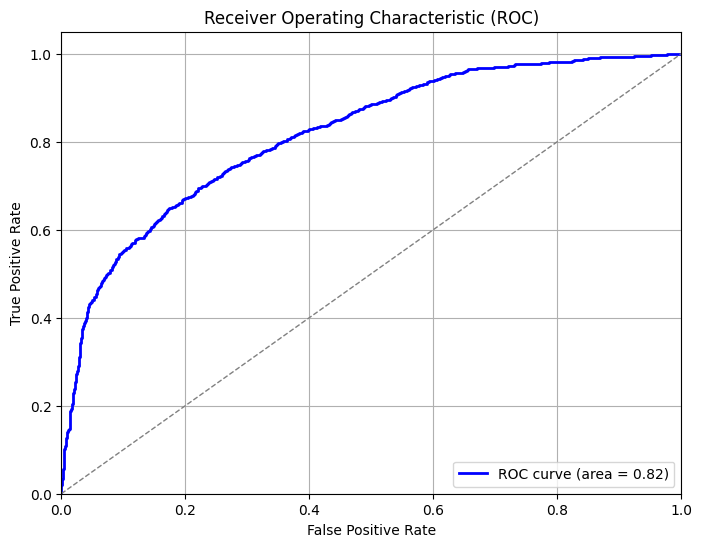

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fazer predições de probabilidade no conjunto de teste
y_test_pred_proba = best_model.predict_proba(X_test)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [38]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 29.6 MB/s eta 0:00:00


 96%|=================== | 3173/3312 [00:27<00:01]       

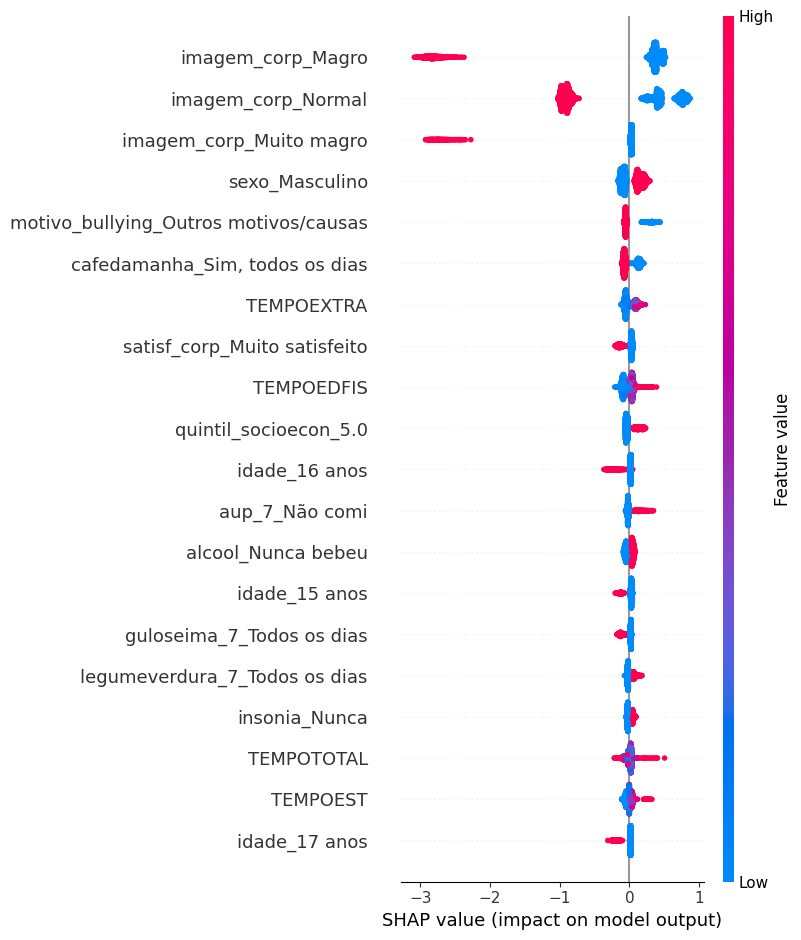

In [39]:
import shap

# Criar um objeto explainer para o modelo
explainer = shap.Explainer(best_model, X_train_balanced)

# Calcular os valores SHAP para o conjunto de teste
shap_values = explainer(X_test)

# Plotar o gráfico SHAP summary
shap.summary_plot(shap_values, X_test)


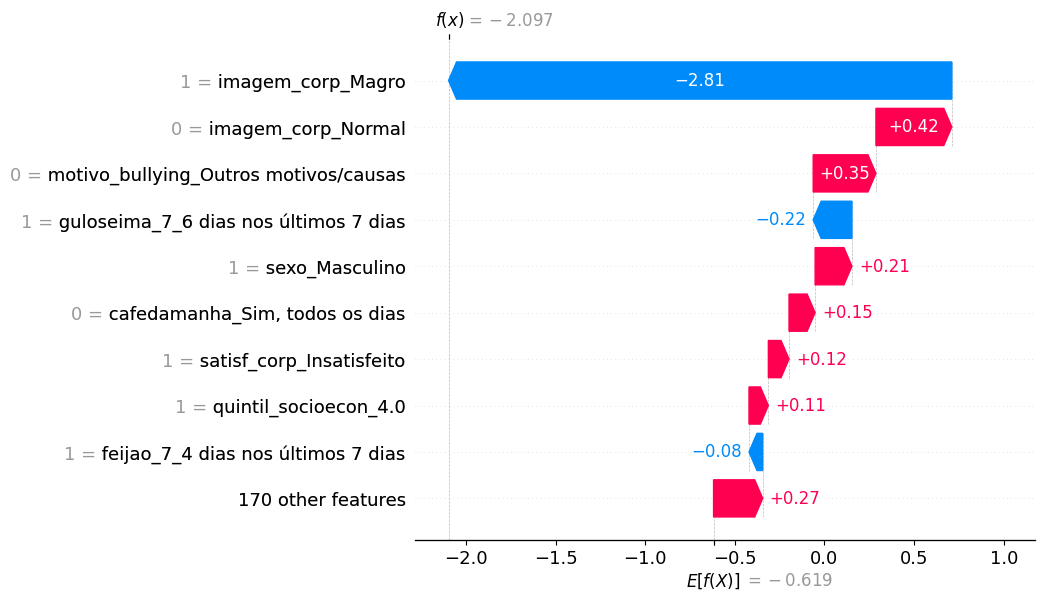

In [40]:
# Escolher uma observação para explicar
index = 0  # Índice da observação no conjunto de teste
shap.plots.waterfall(shap_values[index])

##matriz de confusão

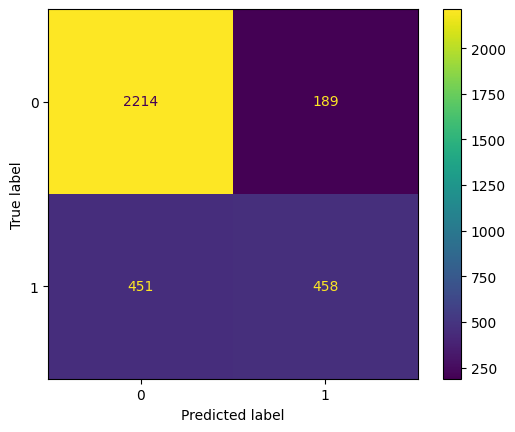

In [41]:
# Criar a matriz de confusão
y_pred = best_model.predict(X_test)  # Generate predictions using your best model
cm = confusion_matrix(y_test, y_pred)

# Import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Exibir a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot() # Add this to display the confusion matrix
plt.show()

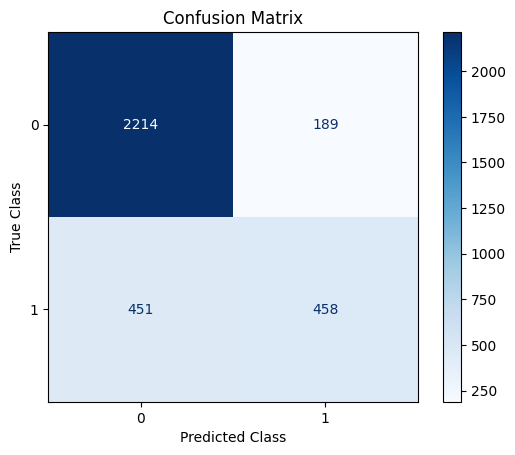

In [42]:
# Configurando o estilo da plotagem para se assemelhar à imagem fornecida
disp.plot(cmap='Blues', values_format='d')

# Ajustar título, labels e exibir o gráfico
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()